In [35]:
import sys, os
import numpy as np
import pandas as pd
import seaborn as sns

In [36]:
# Load stored data
df = pd.read_pickle('../../data-gen/flattened_data.dat')
df.head(10)

,address,attributes_BusinessAcceptsCreditCards,business_id,categories,city,hours_Friday,hours_Thursday,hours_Tuesday,hours_Wednesday,is_open,latitude,longitude,name,postal_code,review_count,stars,state,label
0,1110 Saw Mill Run Blvd,True,7Dv4_HAxsxvadEsT5fxQBg,"Automotive, Auto Repair",Pittsburgh,8:0-17:0,8:0-17:0,8:0-17:0,NaN,1,40.406667,-80.004450,Dependable Brakes & Exhaust,15226,5,5.0,PA,1
1,"800 Fort Duquesne Blvd, Ste 1",True,_4Oe9V-qTpU5iemM9bphlA,"Oil Change Stations, Auto Repair, Automotive, ...",Pittsburgh,7:0-18:0,7:0-18:0,7:0-18:0,8:0-16:0,1,40.444614,-79.999344,Goodyear Auto Service Center,15222,12,3.5,PA,1
2,"415 Gettysburg St, Ste 1",NaN,UyZqOcWxShRRtACCkZFkpQ,"Pet Sitting, Pets, Pet Stores, Pet Services, P...",Pittsburgh,10:0-19:0,10:0-19:0,10:0-19:0,10:0-19:0,1,40.449976,-79.914876,Local Pet,15206,3,5.0,PA,1
3,1801 Chislett St,True,utjb7V7VK5QNdHjMP7H1kw,"Hair Removal, Skin Care, Waxing, Hair Salons, ...",Pittsburgh,11:0-15:30,12:0-20:0,10:0-15:0,11:0-15:30,1,40.485619,-79.925922,Shear Sensations Hair and Body Care Salon,15206,6,5.0,PA,1
4,3301 Library Rd,True,LKF5QS7BQ8oaXnTUaK_mzg,"Automotive, Auto Repair, Transmission Repair",Pittsburgh,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,1,40.369637,-80.010680,Budget Transmissions,15234,3,2.5,PA,0
5,6302 Robinson Centre Dr,NaN,sm5Sl7z9Kx1yXExrdGuZ7g,"Buffets, Restaurants",Pittsburgh,11:0-22:30,11:0-22:30,11:0-22:30,11:0-22:30,0,40.452644,-80.160241,Cho Buffet,15205,7,1.5,PA,0
6,1000 Banksville Rd,True,goar7zF4G0LdsQ1Y4KS3Iw,"Caterers, Event Planning & Services, Restauran...",Pittsburgh,11:0-20:0,11:0-20:0,NaN,11:0-20:0,1,40.419899,-80.030052,Pittsburgh Barbecue Company,15216,91,4.0,PA,1
7,2410 W. Liberty,True,grZ6FnfZoj1pQWElAQve3g,"Fast Food, Restaurants, Burgers",Pittsburgh,10:0-2:0,10:0-2:0,10:0-2:0,10:0-2:0,1,40.400235,-80.024127,Wendy's,15226,22,2.0,PA,0
8,777 Pine Valley Dr,True,xmQI8hN7lWjtfRTfM9CdFA,"Dentists, Health & Medical, General Dentistry",Pittsburgh,NaN,9:0-16:0,9:0-18:0,10:0-19:0,1,40.456001,-79.713374,"David M Petti, DMD- Smiles Forever Family Dent...",15239,3,4.5,PA,1
9,5750 Ellsworth Ave,True,1YC7AbQMlNb5mLUlwwaa3w,"Pizza, Barbeque, Chicken Wings, Nightlife, Res...",Pittsburgh,16:0-0:0,16:0-23:0,16:0-23:0,16:0-23:0,0,40.455696,-79.930883,Bites and Brews,15232,85,3.5,PA,1


In [37]:
df.columns

Index(['address', 'attributes_BusinessAcceptsCreditCards', 'business_id',
       'categories', 'city', 'hours_Friday', 'hours_Thursday', 'hours_Tuesday',
       'hours_Wednesday', 'is_open', 'latitude', 'longitude', 'name',
       'postal_code', 'review_count', 'stars', 'state', 'label'],
      dtype='object')

In [38]:
df.loc[:,'latitude'].unique()
len(df)

7630

In [39]:
# Drop all the columns that have NaN for longiude and latitude
df = df[df['latitude'].notna()]
df = df[df['longitude'].notna()]
df = df[df['review_count'].notna()]
df = df[df['is_open'].notna()]
df = df[df['business_id'].notna()]

len(df)

7630

In [64]:
# Select "clean" features
dfsel = pd.DataFrame()
dfsel = pd.concat([df.loc[:,'business_id'],
                   df.loc[:,'latitude'],
                   df.loc[:,'longitude'],
                   df.loc[:,'review_count'],
                   df.loc[:,'is_open'],
                   df.loc[:,'label']],axis='columns')
dfsel = pd.DataFrame()
dfsel = pd.concat([df.loc[:,'latitude'],
                   df.loc[:,'longitude'],
                   df.loc[:,'label']],axis='columns')

In [65]:
dfsel.head()

,latitude,longitude,label
0,40.406667,-80.004450,1
1,40.444614,-79.999344,1
2,40.449976,-79.914876,1
3,40.485619,-79.925922,1
4,40.369637,-80.010680,0


In [67]:
x = dfsel['latitude'].to_numpy()
y = dfsel['longitude'].to_numpy()
#names = dfsel['business_id'].to_numpy()
labels = dfsel['label'].to_numpy()
x = x.astype('float')
y = y.astype('float')

In [68]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

[(-80.2, -79.7)]

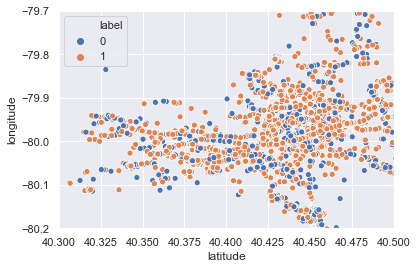

In [78]:
ax = sns.scatterplot(x='latitude',y='longitude', hue='label', data=dfsel)
ax.set(xlim=(40.3,40.5))
ax.set(ylim=(-80.2,-79.7))

In [80]:
fig = ax.get_figure()
fig.savefig('vis.png')